In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import itertools

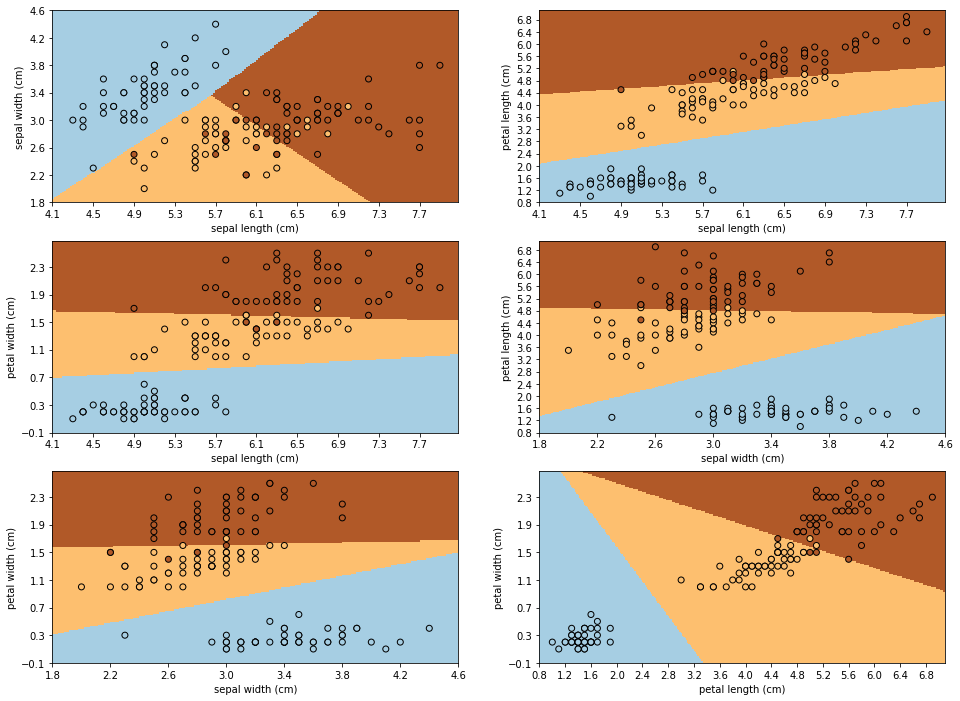

In [2]:
# load iris dataset
iris = load_iris()

X_idxs = itertools.combinations(range(len(iris.feature_names)), 2)
n = len(iris.feature_names) * (len(iris.feature_names) - 1) / 2

# visualize with matlibplot
plt.figure(figsize=(16, 12))

# combination of each 2 features
for i, X_idx in enumerate(X_idxs):
    X_train = iris.data[:, X_idx]
    y_train = iris.target

    # train logistic regression model
    logreg = LogisticRegression(solver='liblinear', multi_class='auto', C=1e5)
    logreg.fit(X_train, y_train)

    # init x/y-axis and predict x/y-meshgrid
    h = .02
    xx_min = X_train[:, 0].min() - .2
    xx_max = X_train[:, 0].max() + .2
    yy_min = X_train[:, 1].min() - .2
    yy_max = X_train[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(xx_min, xx_max, h), np.arange(yy_min, yy_max, h))
    pre_data = np.c_[xx.ravel(), yy.ravel()]
    z = logreg.predict(pre_data)

    z = z.reshape(xx.shape)
    
    # format
    axes = plt.subplot(int(n / 2), 2, i + 1, label='axes_%d' % (i + 1), 
                       xlabel=iris.feature_names[X_idx[0]],
                       ylabel=iris.feature_names[X_idx[1]],
                       xlim=(xx.min(), xx.max()),
                       ylim=(yy.min(), yy.max()),
                       xticks=np.arange(xx_min, xx_max, h * 20),
                       yticks=np.arange(yy_min, yy_max, h * 20))

    # background
    axes.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

    # pred scatter - foreground
    axes.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

plt.show()